Total Iterations: 5000000
Prime (L) Count: 1102224
Twin Prime Pattern (L-R-L) Count: 518285
Simulated Twin Prime Density: 0.103657
Simulated Prime Density (P(L)): 0.220445
Expected L-R-L (if random): 0.037883
Twin Prime Constant (Structure Factor): 2.7362


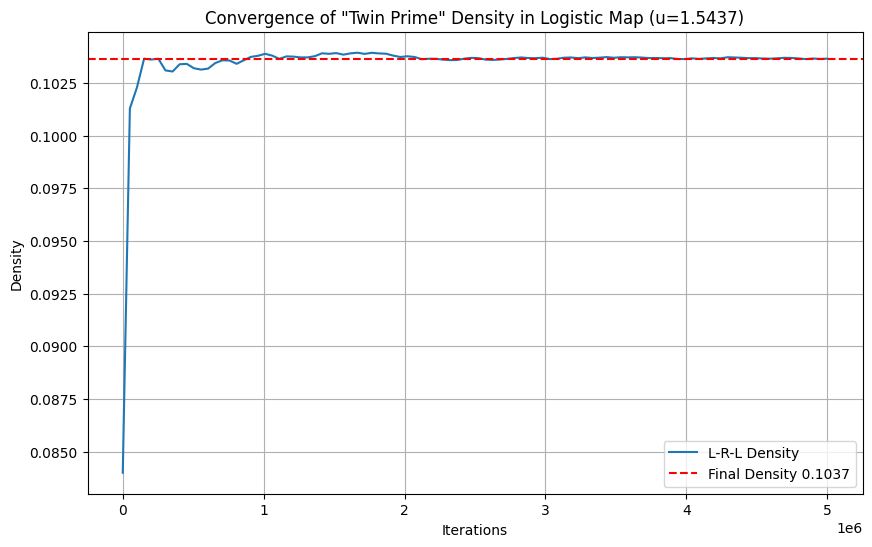

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(x, u):
    return 1 - u * x**2

def run_experiment(n_iterations=10000000):
    # 参数 u 取自论文提及的混沌边缘临界值 [cite: 173]
    u = 1.543689012692076
    
    # 初始化
    x = 0.1
    trajectory = []
    
    # 为了性能，分批处理或使用numpy优化，这里使用简单的循环演示逻辑
    # 预热，消除瞬态
    for _ in range(10000):
        x = logistic_map(x, u)
        
    # 生成轨道
    # 我们不仅需要生成符号，还需要统计 L-R-L 模式
    # L: x < 0, R: x > 0
    
    lrl_count = 0
    l_count = 0
    total_patterns = 0
    
    # 历史缓冲区 [prev_prev, prev, current]
    # 我们用 0 代表 L (Prime), 1 代表 R (Composite)
    buffer = []
    
    # 记录密度变化
    densities = []
    check_points = np.linspace(1000, n_iterations, 100).astype(int)
    
    for i in range(n_iterations):
        x = logistic_map(x, u)
        symbol = 0 if x < 0 else 1 # 0=L, 1=R
        
        if symbol == 0:
            l_count += 1
            
        buffer.append(symbol)
        
        if len(buffer) == 3:
            # 检查 L-R-L 模式 (0-1-0)
            if buffer == [0, 1, 0]:
                lrl_count += 1
            buffer.pop(0) # 移除最旧的
            
        if (i + 1) in check_points:
            densities.append(lrl_count / (i + 1))

    return lrl_count, l_count, n_iterations, densities

# 执行实验
lrl, l_total, n, densities = run_experiment(n_iterations=5000000)

# 输出结果
print(f"Total Iterations: {n}")
print(f"Prime (L) Count: {l_total}")
print(f"Twin Prime Pattern (L-R-L) Count: {lrl}")
print(f"Simulated Twin Prime Density: {lrl/n:.6f}")
print(f"Simulated Prime Density (P(L)): {l_total/n:.6f}")

# 理论对照：如果L是随机的，L-R-L的概率应该是 P(L)*P(R)*P(L)
p_L = l_total / n
p_R = 1 - p_L
expected_random_lrl = p_L * p_R * p_L
print(f"Expected L-R-L (if random): {expected_random_lrl:.6f}")
print(f"Twin Prime Constant (Structure Factor): {lrl/n / expected_random_lrl:.4f}")

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, n, len(densities)), densities, label='L-R-L Density')
plt.axhline(y=lrl/n, color='r', linestyle='--', label=f'Final Density {lrl/n:.4f}')
plt.title(f'Convergence of "Twin Prime" Density in Logistic Map (u={1.5437})')
plt.xlabel('Iterations')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()